In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:\\PROGRAMING\\PROJECT\\MACHINE LEARNING PROJECT\\Brain stroke model\\healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data.bmi=(data.bmi.fillna(data['bmi'].mean()))
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:xlabel='work_type', ylabel='count'>

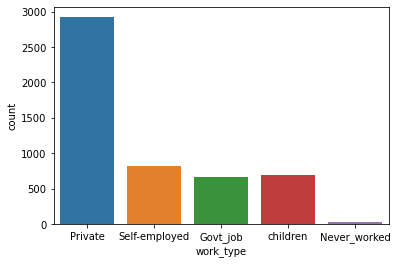

In [7]:
sns.countplot(data['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

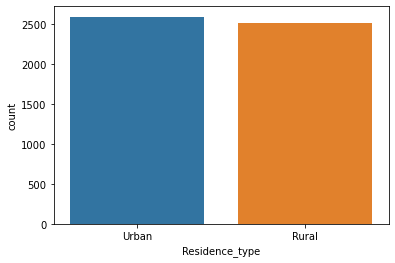

In [8]:
sns.countplot(data['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

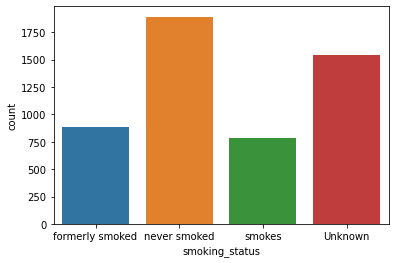

In [9]:
sns.countplot(data['smoking_status'])

<AxesSubplot:xlabel='stroke', ylabel='count'>

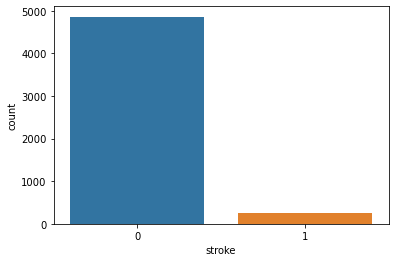

In [10]:
sns.countplot(data['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

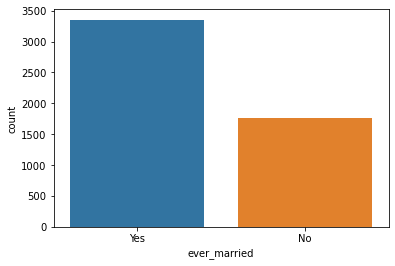

In [11]:
sns.countplot(data['ever_married'])

In [12]:
min_avg_glucose_level = min(data.avg_glucose_level)
max_avg_glucose_level = max(data.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


<AxesSubplot:xlabel='age', ylabel='Density'>

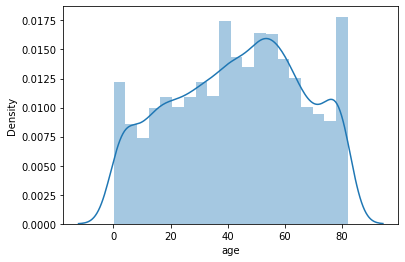

In [13]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='avg_glucose_level'>

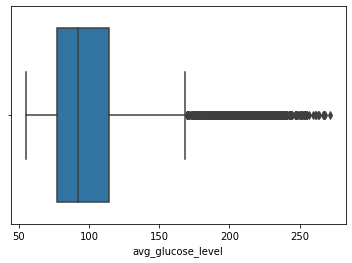

In [14]:
sns.boxplot(data['avg_glucose_level'])

In [15]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

In [16]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.600000,0,0


<AxesSubplot:>

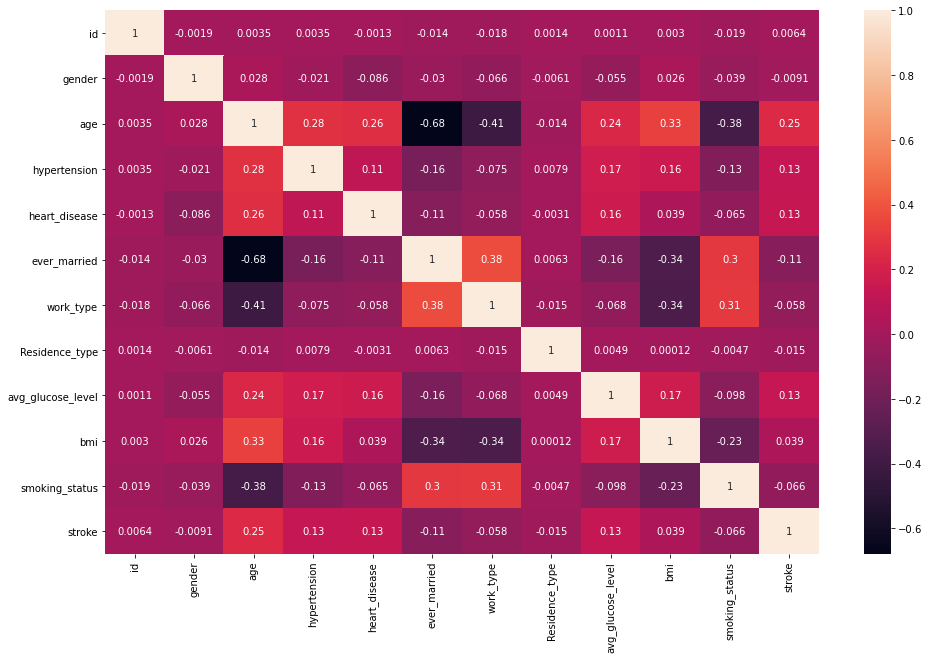

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

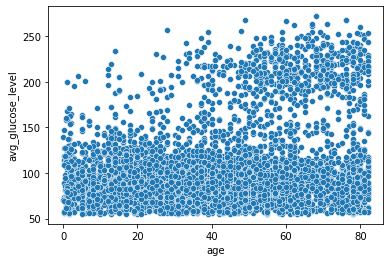

In [18]:
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'])

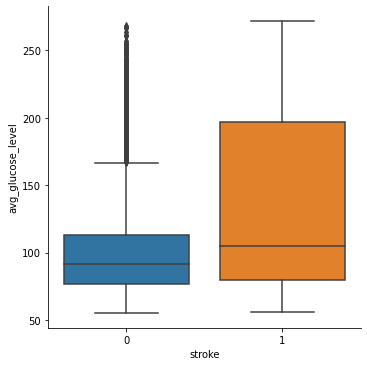

In [19]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data)

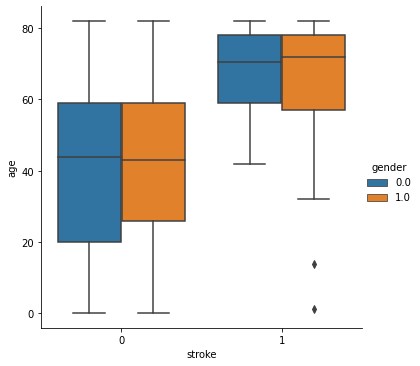

In [20]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data)

In [32]:
X = data.drop('stroke',axis=1)
Y = data['stroke']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=31)


In [35]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.5)
x_train_rs,y_train_rs=os.fit_resample(x_train,y_train)

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(x_train_rs)
# X_test = sc.transform(X_test_)

In [39]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train_rs,y_train_rs)

[11:31:15] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
y_pred1 = model.predict(X_test)
roc_auc_score(y_test, y_pred1)

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
cm

In [ ]:
predicted_probab = model.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

In [ ]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='green',label='XGB Classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model1 = pickle.load(open('model.pkl', 'rb'))